In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

# Dataset

Rice Dataset  
3810개의 쌀알 이미지를 촬영하여 7가지 형태학적 특징을 추출한 데이터셋  
Cammeo, Osmancik의 두 품종으로 분류됨  

https://archive.ics.uci.edu/ml/datasets/Rice+%28Cammeo+and+Osmancik%29#  
https://www.muratkoklu.com/datasets/

In [14]:
data = pd.read_excel('Rice_Cammeo_Osmancik.xlsx', sheet_name='Rice')
data = data.replace('Cammeo', 1)
data = data.replace('Osmancik', 0)
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,1
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,1
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,1
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,1
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,0
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,0
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,0
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,0


In [18]:
x = data.drop(columns='Class')
y = data['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [30]:
n_estimators_list = [5,10,15,20,25,30,35,40,45,50]
learning_rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10,100]

# AdaBoost

stump 형태의 weak learner들로 구성되어 있는 모델로, 각 stump별로 가중치가 서로 다름  
이전 stump의 학습 결과가 다음 stump에 영향을 줌

In [103]:
def adaboost(n):
    model = AdaBoostClassifier(n_estimators=n, learning_rate=1, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [104]:
ada = []

for i in n_estimators_list :
    ada.append(adaboost(i))

ada

[0.9335083114610674,
 0.9326334208223972,
 0.9326334208223972,
 0.9335083114610674,
 0.9326334208223972,
 0.9326334208223972,
 0.9343832020997376,
 0.9300087489063867,
 0.9300087489063867,
 0.9308836395450568]

AdaBoost는 n_estimators 변화에는 크게 영향을 받지 않는다

In [105]:
def adaboost(n):
    model = AdaBoostClassifier(n_estimators=50, learning_rate=n, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [106]:
ada = []

for i in learning_rate_list :
    ada.append(adaboost(i))

ada

C:\Users\jueun\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
C:\Users\jueun\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[0.9335083114610674,
 0.9335083114610674,
 0.9343832020997376,
 0.9343832020997376,
 0.9308836395450568,
 0.07611548556430446,
 0.06911636045494313]

AdaBoost는 learning_rate이 0.0001, 0.001, 0.01, 0.1, 1일 때 좋은 성능을 보인다

# Gradient Boosting Machine (GBM)

이전 단계의 잔차를 gradient에 반영하여 다음 단계에서 보완하는 방향으로 학습

In [107]:
def gbm(n):
    model = GradientBoostingClassifier(loss = 'log_loss', n_estimators=n, learning_rate=0.1, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [108]:
gg_n_l = []

for i in [10,20,30,40,50,60,70,80,90,100] :
    gg_n_l.append(gbm(i))

gg_n_l

[0.9343832020997376,
 0.9291338582677166,
 0.9326334208223972,
 0.9326334208223972,
 0.9343832020997376,
 0.9335083114610674,
 0.9335083114610674,
 0.931758530183727,
 0.9326334208223972,
 0.9300087489063867]

Gradient Boosting Machine도 n_estimators 변화에는 크게 영향을 받지 않는다

In [109]:
def gbm(n):
    model = GradientBoostingClassifier(loss = 'log_loss', n_estimators=100, learning_rate=n, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [110]:
gg_r_l = []

for i in learning_rate_list :
    gg_r_l.append(gbm(i))

gg_r_l

[0.5678040244969379,
 0.5678040244969379,
 0.9352580927384077,
 0.9300087489063867,
 0.916010498687664,
 0.09273840769903761,
 0.4339457567804024]

Gradient Boosting Machine은 learning_rate이 0.01, 0.1일 때 좋은 성능을 보인다

In [111]:
def gbm(n):
    model = GradientBoostingClassifier(loss = 'exponential', n_estimators=n, learning_rate=0.1, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [112]:
gg_n_e = []

for i in [10,20,30,40,50,60,70,80,90,100] :
    gg_n_e.append(gbm(i))

gg_n_e

[0.9352580927384077,
 0.9352580927384077,
 0.9343832020997376,
 0.9361329833770778,
 0.9361329833770778,
 0.9343832020997376,
 0.9326334208223972,
 0.9352580927384077,
 0.9326334208223972,
 0.931758530183727]

In [113]:
def gbm(n):
    model = GradientBoostingClassifier(loss = 'exponential', n_estimators=100, learning_rate=n, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [114]:
gg_r_e = []

for i in learning_rate_list :
    gg_r_e.append(gbm(i))

gg_r_e

[0.5678040244969379,
 0.5678040244969379,
 0.9343832020997376,
 0.931758530183727,
 0.9238845144356955,
 0.7891513560804899,
 0.8145231846019247]

loss function을 exponential로 바꿔서 실험한 결과, log_loss와 비슷한 결과를 보였다.

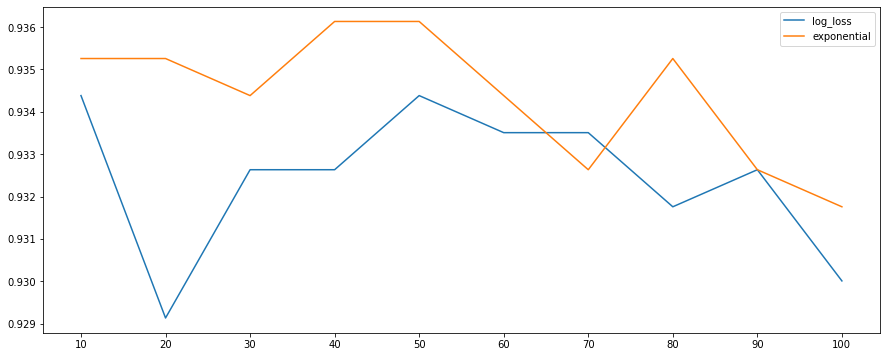

In [115]:
plt.figure(figsize=(15,6))
plt.plot(gg_n_l, label='log_loss')
plt.plot(gg_n_e, label='exponential')
plt.xticks([0,1,2,3,4,5,6,7,8,9], labels=[10,20,30,40,50,60,70,80,90,100])
plt.legend()

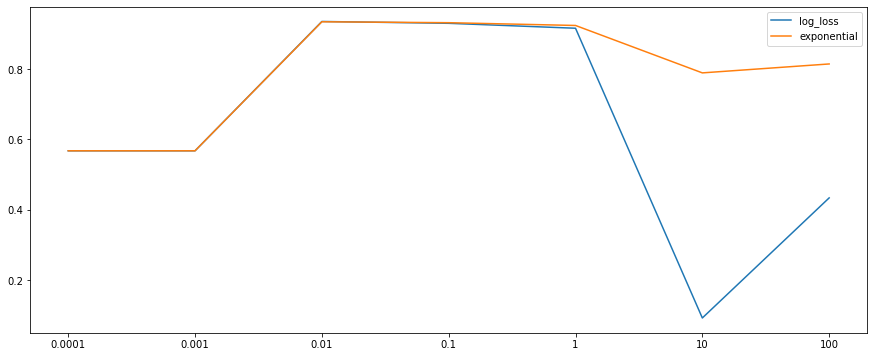

In [116]:
plt.figure(figsize=(15,6))
plt.plot(gg_r_l, label='log_loss')
plt.plot(gg_r_e, label='exponential')
plt.xticks([0,1,2,3,4,5,6], labels=learning_rate_list)
plt.legend()

다만 parameter의 변화에서 exponential이 log_loss보다 대체로 약간 더 좋은 성능을 보임을 알 수 있다.

# XGBoost

GBM을 병렬로 수행하는 알고리즘으로, 컴퓨팅 효율이 좋고 학습 시간이 빠름

In [117]:
def xgb(n):
    model = XGBClassifier(n_estimators=n, learning_rate=1, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [118]:
xx = []

for i in [10,20,30,40,50,60,70,80,90,100] :
    xx.append(xgb(i))

xx

[0.9186351706036745,
 0.9168853893263342,
 0.9256342957130359,
 0.9186351706036745,
 0.9203849518810149,
 0.9168853893263342,
 0.9186351706036745,
 0.9195100612423447,
 0.916010498687664,
 0.9133858267716536]

XGBoost는 n_estimators의 변화에 큰 성능 차이를 보이지 않으나, 그래도 30일 때 가장 좋은 성능을 보인다

In [119]:
def xgb(n):
    model = XGBClassifier(n_estimators=30, learning_rate=n, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [120]:
xx = []

for i in learning_rate_list :
    xx.append(xgb(i))

xx

[0.9247594050743657,
 0.9256342957130359,
 0.9221347331583553,
 0.9300087489063867,
 0.9256342957130359,
 0.5678040244969379,
 0.5678040244969379]

XGBoost는 learning_rate이 0.1일 때 가장 좋은 성능을 보인다

# LightGBM

최대 손실 값을 갖는 리프 노드를 지속적으로 분할하는 기법  
XGBoost보다 학습 시간과 메모리 사용량이 더 적은 알고리즘

In [121]:
def light(n):
    model = LGBMClassifier(n_estimators=n, learning_rate=1, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [122]:
li = []

for i in [10,20,30,40,50,60,70,80,90,100] :
    li.append(light(i))

li

[0.910761154855643,
 0.9151356080489939,
 0.9168853893263342,
 0.9186351706036745,
 0.9098862642169728,
 0.9081364829396326,
 0.9081364829396326,
 0.9063867016622922,
 0.905511811023622,
 0.905511811023622]

LightGBM은 n_estimators의 변화에 큰 성능 차이를 보이지 않으나, 그래도 40일 때 가장 좋은 성능을 보인다

In [123]:
def light(n):
    model = LGBMClassifier(n_estimators=40, learning_rate=n, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [124]:
li = []

for i in learning_rate_list :
    li.append(light(i))

li

[0.5678040244969379,
 0.5678040244969379,
 0.916010498687664,
 0.9308836395450568,
 0.9186351706036745,
 0.8416447944007,
 0.5538057742782152]

LightGBM은 learning_rate이 0.1일 때 가장 좋은 성능을 보인다

# CatBoost

이전 단계의 잔차를 gradient에 반영하여 다음 단계에서 보완하는 방향으로 학습할 때 일부 데이터의 잔차만 고려하는 모델  
과적합 방지를 위해 데이터 순서를 섞어줌

In [100]:
def cat(n):
    model = CatBoostClassifier(n_estimators=n, learning_rate=1, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [101]:
cc = []

for i in [10,20,30,40,50,60,70,80,90,100] :
    cc.append(cat(i))

cc

0:	learn: 0.2935407	total: 135ms	remaining: 1.21s
1:	learn: 0.2222121	total: 136ms	remaining: 544ms
2:	learn: 0.2024263	total: 137ms	remaining: 320ms
3:	learn: 0.1924435	total: 138ms	remaining: 207ms
4:	learn: 0.1882662	total: 139ms	remaining: 139ms
5:	learn: 0.1851621	total: 140ms	remaining: 93.1ms
6:	learn: 0.1820643	total: 141ms	remaining: 60.2ms
7:	learn: 0.1793913	total: 141ms	remaining: 35.4ms
8:	learn: 0.1760044	total: 142ms	remaining: 15.8ms
9:	learn: 0.1708047	total: 143ms	remaining: 0us
0:	learn: 0.2935407	total: 1.14ms	remaining: 21.6ms
1:	learn: 0.2222121	total: 2.05ms	remaining: 18.5ms
2:	learn: 0.2024263	total: 3.12ms	remaining: 17.7ms
3:	learn: 0.1924435	total: 4ms	remaining: 16ms
4:	learn: 0.1882662	total: 4.87ms	remaining: 14.6ms
5:	learn: 0.1851621	total: 5.74ms	remaining: 13.4ms
6:	learn: 0.1820643	total: 6.61ms	remaining: 12.3ms
7:	learn: 0.1793913	total: 7.43ms	remaining: 11.1ms
8:	learn: 0.1760044	total: 8.3ms	remaining: 10.1ms
9:	learn: 0.1708047	total: 9.14ms	re

28:	learn: 0.1363234	total: 25.2ms	remaining: 26.9ms
29:	learn: 0.1329707	total: 26.3ms	remaining: 26.3ms
30:	learn: 0.1298031	total: 27.2ms	remaining: 25.4ms
31:	learn: 0.1283420	total: 28.1ms	remaining: 24.6ms
32:	learn: 0.1259887	total: 29ms	remaining: 23.7ms
33:	learn: 0.1254464	total: 30.1ms	remaining: 23ms
34:	learn: 0.1244199	total: 31.4ms	remaining: 22.4ms
35:	learn: 0.1230928	total: 32.3ms	remaining: 21.5ms
36:	learn: 0.1215291	total: 33.3ms	remaining: 20.7ms
37:	learn: 0.1199360	total: 34.1ms	remaining: 19.8ms
38:	learn: 0.1189118	total: 35ms	remaining: 18.9ms
39:	learn: 0.1166434	total: 36ms	remaining: 18ms
40:	learn: 0.1151951	total: 37ms	remaining: 17.2ms
41:	learn: 0.1148703	total: 37.9ms	remaining: 16.3ms
42:	learn: 0.1136855	total: 38.8ms	remaining: 15.3ms
43:	learn: 0.1122807	total: 39.7ms	remaining: 14.4ms
44:	learn: 0.1108340	total: 40.5ms	remaining: 13.5ms
45:	learn: 0.1106359	total: 41.3ms	remaining: 12.6ms
46:	learn: 0.1082504	total: 42.5ms	remaining: 11.8ms
47:	l

0:	learn: 0.2935407	total: 1.17ms	remaining: 116ms
1:	learn: 0.2222121	total: 2.1ms	remaining: 103ms
2:	learn: 0.2024263	total: 2.98ms	remaining: 96.3ms
3:	learn: 0.1924435	total: 3.87ms	remaining: 93ms
4:	learn: 0.1882662	total: 4.83ms	remaining: 91.7ms
5:	learn: 0.1851621	total: 5.7ms	remaining: 89.3ms
6:	learn: 0.1820643	total: 6.57ms	remaining: 87.3ms
7:	learn: 0.1793913	total: 7.41ms	remaining: 85.2ms
8:	learn: 0.1760044	total: 8.29ms	remaining: 83.8ms
9:	learn: 0.1708047	total: 9.15ms	remaining: 82.3ms
10:	learn: 0.1698019	total: 10ms	remaining: 81.1ms
11:	learn: 0.1658548	total: 10.9ms	remaining: 80.2ms
12:	learn: 0.1641053	total: 11.8ms	remaining: 78.9ms
13:	learn: 0.1632324	total: 12.6ms	remaining: 77.6ms
14:	learn: 0.1595377	total: 13.7ms	remaining: 77.6ms
15:	learn: 0.1569235	total: 14.5ms	remaining: 76.3ms
16:	learn: 0.1556161	total: 15.5ms	remaining: 75.7ms
17:	learn: 0.1537914	total: 16.4ms	remaining: 74.6ms
18:	learn: 0.1524720	total: 17.2ms	remaining: 73.3ms
19:	learn: 

[0.9273840769903762,
 0.9300087489063867,
 0.926509186351706,
 0.9300087489063867,
 0.9308836395450568,
 0.9300087489063867,
 0.9247594050743657,
 0.926509186351706,
 0.9247594050743657,
 0.9238845144356955]

CatBoost는 n_estimators의 변화에 큰 성능 차이를 보이지 않으나, 그래도 50일 때 가장 좋은 성능을 보인다

In [125]:
def cat(n):
    model = CatBoostClassifier(n_estimators=50, learning_rate=n, random_state=2022)
    model = model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return metrics.accuracy_score(test_y, y_pred)

In [126]:
cc = []

for i in learning_rate_list :
    cc.append(cat(i))

cc

0:	learn: 0.6930741	total: 1.88ms	remaining: 92ms
1:	learn: 0.6930042	total: 3.1ms	remaining: 74.5ms
2:	learn: 0.6929301	total: 4.52ms	remaining: 70.8ms
3:	learn: 0.6928616	total: 5.72ms	remaining: 65.8ms
4:	learn: 0.6927910	total: 6.8ms	remaining: 61.2ms
5:	learn: 0.6927201	total: 7.82ms	remaining: 57.4ms
6:	learn: 0.6926476	total: 8.74ms	remaining: 53.7ms
7:	learn: 0.6925751	total: 9.74ms	remaining: 51.1ms
8:	learn: 0.6925069	total: 10.6ms	remaining: 48.5ms
9:	learn: 0.6924336	total: 11.5ms	remaining: 46.1ms
10:	learn: 0.6923618	total: 12.5ms	remaining: 44.4ms
11:	learn: 0.6922882	total: 13.7ms	remaining: 43.2ms
12:	learn: 0.6922165	total: 14.7ms	remaining: 41.8ms
13:	learn: 0.6921461	total: 15.6ms	remaining: 40.2ms
14:	learn: 0.6920726	total: 16.6ms	remaining: 38.8ms
15:	learn: 0.6920026	total: 17.6ms	remaining: 37.3ms
16:	learn: 0.6919324	total: 18.5ms	remaining: 36ms
17:	learn: 0.6918589	total: 19.6ms	remaining: 34.8ms
18:	learn: 0.6917888	total: 20.5ms	remaining: 33.4ms
19:	learn

26:	learn: 0.1392530	total: 25.4ms	remaining: 21.7ms
27:	learn: 0.1372891	total: 26.4ms	remaining: 20.8ms
28:	learn: 0.1363234	total: 27.3ms	remaining: 19.8ms
29:	learn: 0.1329707	total: 28.2ms	remaining: 18.8ms
30:	learn: 0.1298031	total: 29.1ms	remaining: 17.8ms
31:	learn: 0.1283420	total: 30ms	remaining: 16.9ms
32:	learn: 0.1259887	total: 31.2ms	remaining: 16.1ms
33:	learn: 0.1254464	total: 32.1ms	remaining: 15.1ms
34:	learn: 0.1244199	total: 33ms	remaining: 14.2ms
35:	learn: 0.1230928	total: 33.9ms	remaining: 13.2ms
36:	learn: 0.1215291	total: 34.7ms	remaining: 12.2ms
37:	learn: 0.1199360	total: 35.6ms	remaining: 11.2ms
38:	learn: 0.1189118	total: 36.4ms	remaining: 10.3ms
39:	learn: 0.1166434	total: 37.4ms	remaining: 9.34ms
40:	learn: 0.1151951	total: 38.2ms	remaining: 8.38ms
41:	learn: 0.1148703	total: 39.2ms	remaining: 7.47ms
42:	learn: 0.1136855	total: 40.1ms	remaining: 6.53ms
43:	learn: 0.1122807	total: 41ms	remaining: 5.6ms
44:	learn: 0.1108340	total: 41.9ms	remaining: 4.66ms


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


[0.9335083114610674,
 0.9335083114610674,
 0.9335083114610674,
 0.937007874015748,
 0.9308836395450568,
 0.8731408573928259,
 0.7471566054243219]

CatBoost는 learning_rate이 0.1일 때 가장 좋은 성능을 보인다

# Conclusion

동일한 dataset을 서로 다른 다섯 개의 boosting 알고리즘에 적용해본 결과, 각 알고리즘별 최고 성능을 기준으로 CatBoost가 가장 좋은 성능을 보인다  

AdaBoost : 0.9343832020997376  
GBM      : 0.9343832020997376  
XGBoost  : 0.9300087489063867  
LightGBM : 0.9308836395450568  
CatBoost : 0.937007874015748  